## EE 502 P: Analytical Methods for Electrical Engineering
    
# Homework 8: Probability and Markov Processes
## Due December 10, 2023 by 11:59 PM
### <span style="color: red">David Petkov</span>

Copyright &copy; 2023, University of Washington

<hr>

**Instructions**: Please use this notebook as a template. Answer all questions using well formatted Markdown with embedded LaTeX equations, executable Jupyter cells, or both. Submit your homework solutions as an `.ipynb` file via Canvas.

<span style="color: red'">
Although you may discuss the homework with others, you must turn in your own, original work.
</span>

**Things to remember:**
- Use complete sentences. Equations should appear in text as grammatical elements.
- Comment your code.
- Label your axes. Title your plots. Use legends where appropriate.
- Before submitting a notebook, choose Kernel -> Restart and Run All to make sure your notebook runs when the cells are evaluated in order.

In [2]:
import networkx as nx
import math
import scipy
import scipy.integrate as spi
import numpy as np
import sympy as sm
sm.init_printing(use_latex='mathjax')
import matplotlib.pyplot as plt
import itertools
import random
%matplotlib inline

## 1. Dice

Suppose two dice are tossed, but that the dice are weighted so that 1 comes up as twice as likely as any other number for both dice.

a) What is the probability of getting a sum of seven?

b) What is the probability of getting a sum of seven given that the first die comes up 1?

c) What is the probability neither die coming up 1?

d) What is the PDF of the random variable $X$ defined to the the sum of the two dice?

## Answers to Problem 1 (Clean up before submission)

$P(1) = 2/7, P(2 \rightarrow 6) = 1/7$

#a)
Possibilities include: $ (1+6), (6+1), (2+5), (5+2), (3+4), (4+3)$

$2 \times ((2/7 *1/7)+2 \times (1/7)^2) = 8/49 $

#b)
Second dice must roll a 6, and $P(6) = 1/7$ which is the probability and the answer.

#c)
Probability a dice doesnt roll a 1 is $5/7$. \\
$(5/7)^2 = 25/49$

#d)

$f_X(2) = P(1 + 1) = (2/7)^2 = 4/49 $ \\
$f_X(3) = 2P(1 + 2) = 2*(2/7)*(1/7) = 4/49 $ \\
$f_X(4) = 2P(1 + 3) + P(2 + 2) = 2*(2/7)*(1/7) + (1/7)^2 = 5/49  $ \\
$f_X(5) = 2P(1 + 4) + 2P(2 + 3) = 2*(2/7)*(1/7) + 2(1/7)^2 = 6/49$ \\
$f_X(6) = 2P(1 + 5) + 2P(2 + 4) + P(3 + 3) = 2*(2/7)*(1/7) + 2(1/7)^2 + (1/7)^2 = 7/49 $ \\
$f_X(7) = 2P(1 + 6) + 2P(2 + 5) + 2*P(3 + 4) = 2*(2/7)*(1/7) + 2(1/7)^2 + 2(1/7)^2 = 8/49 $ \\
$f_X(8) = 2P(2 + 6) + 2P(3 + 5) + P(4 + 4) = 2*(1/7)^2 + 2*(1/7) + (1/7)^2 = 5/49 $ \\
$f_X(9) = 2P(6 + 3) + 2P(5 + 4) = 2*(1/7)^2 + 2*(1/7)^2 = 4/49 $ \\
$f_X(10) = 2P(4 + 6) + P(5 + 5) = 2*(1/7)^2 + (1/7)^2 = 3/49 $ \\
$f_X(11) = 2P(5 + 6) = 2(1/7)^2 = 2/49 $ \\
$f_X(12) = P(6 + 6) = 1/49 $ \\

## 2. Functions of a Random Variable

Suppose $X$ is distributed uniformly in the interval $[0,1]$. That is, $f_X(x) = 1$ if $x \in [0,1]$ and $f_X(x) = 0$ otherwise.

a) What is the CDF of $X$?

b) Let $Y = X^2$. Find and plot $F_Y$ and $f_Y$.

## Answers to Problem 2

a) The following is the CDF only on the interval $[0,1]$, $0$ otherwise.

$$
F_X(x) = P[X \leq x] = \int_{-\infty}^\infty \;f_X(x) dx \\
=\int_{0}^x \;1 dx=x
$$

b)

$$
Y=X^2 \rightarrow F_Y = \sqrt{Y}\\
f_Y=\frac{d}{dy}\sqrt{Y}= \frac{1}{2 \sqrt{Y}}
$$

<ipython-input-3-9bfdb98ba472>:9: RuntimeWarning: divide by zero encountered in divide
  plt.plot(t,1/(2*(t**0.5)), label="$f_Y$")


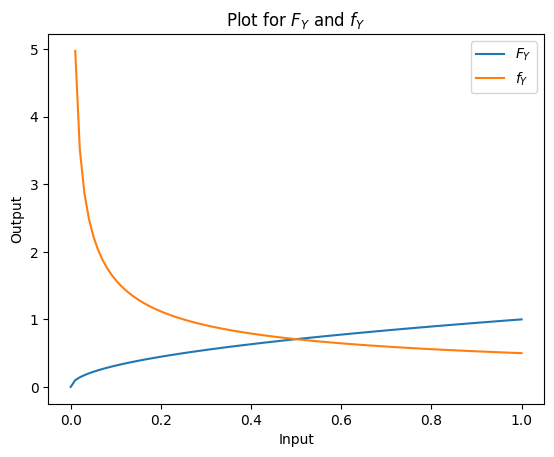

In [3]:
# Code for Problem 2b

# Define x axis
t = np.linspace(0,1,100)


# Plot Characteristics
plt.plot(t,t**0.5, label="$F_Y$")
plt.plot(t,1/(2*(t**0.5)), label="$f_Y$")
plt.title("Plot for $F_Y$ and $f_Y$")
plt.xlabel("Input")
plt.ylabel("Output")
plt.legend()
plt.show()

## 3. PDF and CDF

Suppose that a random variable $X$ has PDF defined by

$$
f_X(x) = \left \{
\begin{array}{ll}
a(1+x) & \; \mathrm{if} \; -1 < x \leq 0 \\
a(1-x) & \; \mathrm{if} \; 0 < x < 1 \\
0 & \; \mathrm{otherwise}.
\end{array}
\right .
$$

a) What does the value of $a$ need to be to make $f_X$ a probability distribution? Plot $f_X$ for this value.

b) Find and plot $F_X$.

c) Find $b$ such that $P[X>b] = \frac{1}{2} P[X \leq b]$.

## Answers to Problem 3

# a)

$$
 \int_{-\infty}^\infty \;f_X(x) dx =\int_{-1}^0 a(1+x) \; dx  +\int_{0}^1 a(1-x) \; dx = 1 \\
=[a(x+ \frac{x^2}{2})]_{-1}^0 +[a(x- \frac{x^2}{2})]_{0}^1 =1\\
=\frac{a}{2}+\frac{a}{2}=1 \\
a=1
$$

# b)

$$
f_X(x) = \left \{
\begin{array}{ll}
(1+x) & \; \mathrm{if} \; -1 < x \leq 0 \\
(1-x) & \; \mathrm{if} \; 0 < x < 1
\end{array}
\right . \\
F_X = \int_{-1}^0 (1+x) \; dx +\int_{0}^x (1-x) \; dx\\
\int_{-1}^x (1+x) \; dx = (x+ \frac{x^2}{2})_{-1}^x = \frac{x^2}{2} +x +0.5 \ for \ -1 < x \le 0 \\
\int_{-1}^0 (1+x) \; dx + \int_{0}^x (1-x) \; dx = (x+ \frac{x^2}{2})_{-1}^0+ (x- \frac{x^2}{2})_{0}^x = -\frac{x^2}{2} +x+0.5 \ for \ 0 < x < 1
$$

# c)

$$
P[X>b] = \frac{1}{2} P[X \leq b] \\
1-P[X \le b] = \frac{1}{2}P[X \leq b] \\
\frac{3}{2}P[X \leq b]=1 \\
F_X(b) = \frac{2}{3} \\
 -\frac{b^2}{2} +b+0.5 = \frac{2}{3} \\
 b \approx 0.1835
$$

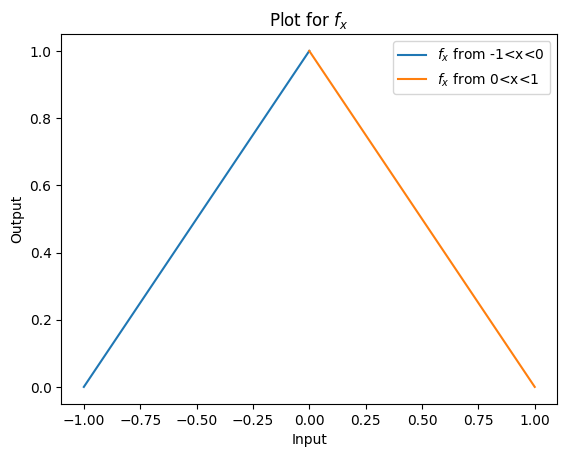

In [4]:
#Code for Problem 3a

# Define x axis for both equations
T = np.linspace(0,1,100)
t = np.linspace(-1,0,100)

# Plot Characteristics
plt.plot(t,1+t, label="$f_x$ from -1<x<0")
plt.plot(T,1-T, label="$f_x$ from 0<x<1")
plt.title("Plot for $f_x$")
plt.xlabel("Input")
plt.ylabel("Output")
plt.legend()
plt.show()

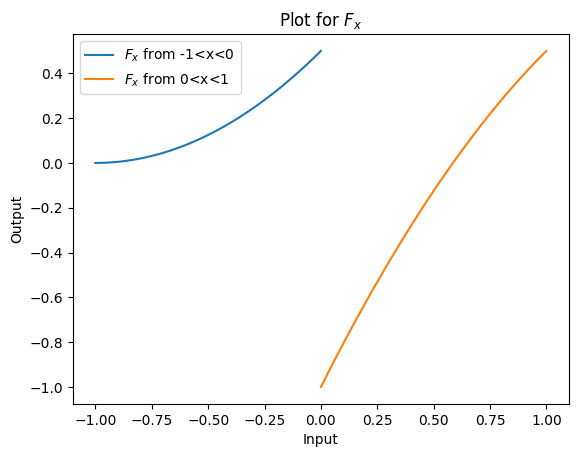

In [5]:
#Code for Problem 3b

# Define x axis for both equations
T = np.linspace(0,1,100)
t = np.linspace(-1,0,100)

# Plot Characteristics
plt.plot(t,((t**2)/2)+t+0.5, label="$F_x$ from -1<x<0")
plt.plot(T,(-(t**2)/2)+t+0.5, label="$F_x$ from 0<x<1")
plt.title("Plot for $F_x$")
plt.xlabel("Input")
plt.ylabel("Output")
plt.legend()
plt.show()

## 4. Markov Process Properties

Consider the three Markov Processes depicted here:[Markov Processes (also available on Canvas)](https://colab.research.google.com/drive/1ZFidt_dytpPTqcC5WVFtuhIkvJ8uQlSU#scrollTo=S-APhzBENwAv)

For each process,

i) Find the period of each state.

ii) Identify transient states.

iii) Identify absorbing states and absorbing subsets of states.

iv) Identify ergodic states.

## Answers to Problem 4

# i)

a) Period 2 for all states since they can all go to a neighbor then return. Example: $0 \rightarrow 1 \rightarrow 0$.

b) Period of 4 for all states.

c) State 0 is transient, no possible return, period 0. For the rest, the period is 2 (assuming their respective subset was accessed by the path).  

# ii)

a and b) None

c) State 0, and either a combination of sets {1,2}&{3,4}, {1,2}&{5,6} or {3,4}&{5,6} depending on whether the path from 0 goes to 5, 3, or 1 respectively.

#iii)

a and b) None

c) Subsets {1,2}, {3,4}, and {5,6} are all separately absorbing once reached.


# iv)

a) All states

b) State 3

c) No states are ergodic.

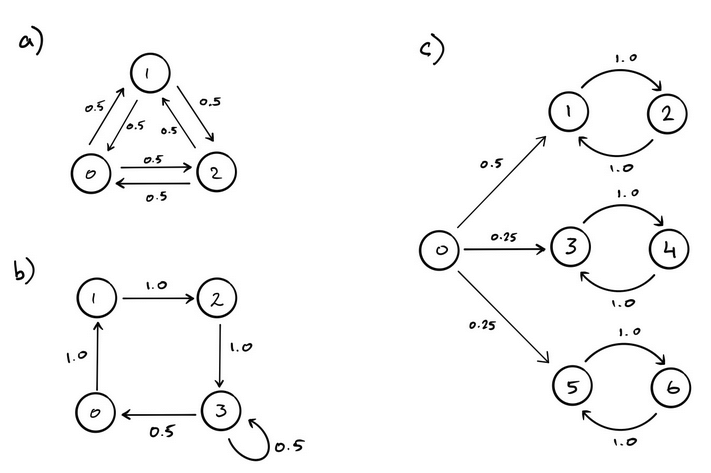

## 5. Stationary Distributions

For each Markov Process in Problem 4:

i) Find the update matrix $Q$.

ii) Simulate the dynamics $p_{k+1} = p_k Q$ starting at the distribution in which $p_0(0) = 1$. Make a plot of the dynamics for each system. To do this, plot a 2D grid where grid point $(k,i)$ is a gray-scale square corresponding to the probability that the process is in state $i$ at time $k$ (the Gambler's Ruin example in the notes does this).

## Answers to Problem 5

# a)

$$
Q_a = \begin{pmatrix}
0 & 0.5  & 0.5\\
0.5 &0& 0.5 \\
0.5&0.5&0
\end{pmatrix}
$$

$$
Q_b = \begin{pmatrix}
0 & 1  & 0&0\\
0 &0& 1&0 \\
0&0&0&1 \\
0.5&0&0&0.5
\end{pmatrix}
$$

$$
Q_c = \begin{pmatrix}
0& 0.5 & 0  & 0.25&0&0.25&0\\
0 &0& 1&0&0&0&0 \\
0&1&0&0&0&0&0 \\
0&0&0&0&1&0&0 \\
0&0&0&1&0&0&0 \\
0&0&0&0&0&0 &1 \\
0&0&0&0&0&1 &0
\end{pmatrix}
$$

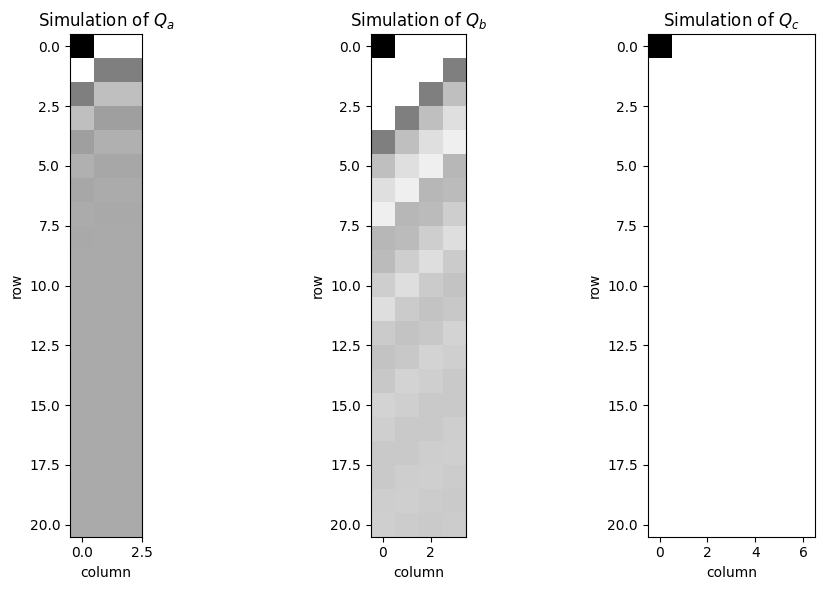

In [72]:
# Code for Problem 5b

# Define all the matrices
A = np.array([[0,0.5,0.5], [0.5,0,0.5],[0.5,0.5,0]])
B = np.array([[0,1,0,0], [0,0,1,0],[0,0,0,1],[0.5,0,0,0.5]])
C = np.array([[0,0.5,0, 0.25,0,0.25,0], [0,0,1,0,0,0,0],[0,1,0,0,0,0,0],[0,0,0,0,1,0,0],[0,0,0,1,0,0,0],[0,0,0,0,0,0,1],[0,0,0,0,0,1,0]])
a = np.array([[1],[0],[0]])
b = np.array([[1],[0],[0],[0]])
c = np.array([[1],[0],[0],[0],[0],[0],[0]])

# The first entry of each trajectory is p_0
trajectory1 = [a]
trajectory2 = [b]
trajectory3 = [c]

# Simulate each trajectory for k=1 to k=20
for t in range(20):
    a = A.dot(a)
    b = B.dot(b)
    c = C.dot(c)
    trajectory1.append(a)
    trajectory2.append(b)
    trajectory3.append(c)

# Plot  characteristics
fig,ax = plt.subplots(1,3, figsize=(10,6),tight_layout=True)
ax[0].imshow(trajectory1,cmap="gray_r"); ax[0].set_xlabel("column");ax[0].set_ylabel("row");ax[0].set_title("Simulation of $Q_a$")
ax[1].imshow(trajectory2,cmap="gray_r"); ax[1].set_xlabel("column");ax[1].set_ylabel("row");ax[1].set_title("Simulation of $Q_b$")
ax[2].imshow(trajectory3,cmap="gray_r"); ax[2].set_xlabel("column");ax[2].set_ylabel("row");ax[2].set_title("Simulation of $Q_c$")
plt.show()